In [1]:
#importing our dependencies

import requests
import os
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#setting up the path to the csv files we will use...and also running them through the csv reader

award_csv = 'Output/Final_Award_Data.csv'
award_df = pd.read_csv(award_csv)

grossing_csv = 'Output/Final_Grossing_Data.csv'
grossing_df = pd.read_csv(grossing_csv)

In [3]:
#splitting up the genre of each award winning film into separate columns

award_df[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5']] = award_df['Movie Genre'].str.split(",",expand = True)

In [4]:
#stripping the space that was included when we separated the original genre column by commas

award_df['Genre 1'] = award_df['Genre 1'].str.strip()
award_df['Genre 2'] = award_df['Genre 2'].str.strip()
award_df['Genre 3'] = award_df['Genre 3'].str.strip()
award_df['Genre 4'] = award_df['Genre 4'].str.strip()
award_df['Genre 5'] = award_df['Genre 5'].str.strip()

In [5]:
#taking the runtime of each film and splitting the actual minutes from the word "min"

award_df[['Minutes', 'Minutes 2']] = award_df['Runtime'].str.split(" ",expand = True)

In [6]:
#locating the only Rotten Tomatoes Rating that was in a strange format

award_df.loc[award_df['Rotten Tomatoes Rating']=='37/100']

,Award,Year,Movie Title,Movie Genre,Runtime,Actors,IMDB Rating,Rotten Tomatoes Rating,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Minutes,Minutes 2
22,BEST MOTION PICTURE,1949,All the King's Men,"Drama, Thriller",128 min,"Sean Penn, Jude Law, Anthony Hopkins, Kate Win...",6.2/10,37/100,Drama,Thriller,None,None,None,128,min


In [7]:
#replacing the incorrect format of the Rotten Tomatoes Rating with the correct format

award_df = award_df.replace(to_replace = ["37/100"], value = "37%")

In [8]:
#replacing the "%" from the Rotten Tomatoes Ratings with a ".0" and changing the type to "float"

award_df['Rotten Tomatoes Rating'] = award_df['Rotten Tomatoes Rating'].str.replace(r'%', r'.0').astype('float')

In [9]:
#changing the minutes column (runtime) from a string to a float

award_df['Minutes'] = award_df['Minutes'].astype('float')

In [10]:
#replacing the "/10" from the IMDB Ratings with nothing and changing the type to "float"

award_df['IMDB Rating'] = award_df['IMDB Rating'].str.replace(r'/10', r'').astype('float')

In [11]:
#running through the entire award winning data frame and replacing any values of "none" with a blank value

award_df = award_df.replace(to_replace = [None], value = "")

In [12]:
#creating a list from all of the unique values in all 5 of the genre columns from the awards data

genre_list_award = list(set(list(np.unique(award_df[['Genre 1','Genre 2','Genre 3', 'Genre 4','Genre 5']].values))[1:]))

In [13]:
#checking to make sure the award list was stored correctly and that it looks accurate

genre_list_award

['Adventure',
 'Comedy',
 'Western',
 'Family',
 'Film-Noir',
 'Action',
 'Music',
 'Fantasy',
 'Musical',
 'Romance',
 'Thriller',
 'Crime',
 'History',
 'Biography',
 'Mystery',
 'War',
 'Drama',
 'Sport']

In [14]:
#create a blank list to store the count of each genre from our genre list

genre_counts_award = []

#create a for loop to count how many times each genre shows up in one of the 5 genre columns

for genre in genre_list_award:
    
    genre_count = ((award_df['Genre 1'] == genre) | (award_df['Genre 2'] == genre) | (award_df['Genre 3'] == genre) | (award_df['Genre 4'] == genre) | (award_df['Genre 5'] == genre)).sum()
    
    genre_counts_award.append(genre_count)
    

In [15]:
#checking to make sure that our award genre counts were stored correctly and that they look accurate

genre_counts_award

[10, 16, 4, 6, 1, 4, 3, 2, 9, 33, 13, 13, 14, 20, 2, 17, 87, 3]

In [16]:
#creating a data frame with genre and genre count from the above lists for the award winning films

genre_award_df = pd.DataFrame({
    'Genre': genre_list_award,
    'Count': genre_counts_award    
})

#sorting our new data frame by count

genre_award_df.sort_values(by=['Count'], ascending = False)

,Genre,Count
16,Drama,87
9,Romance,33
13,Biography,20
15,War,17
1,Comedy,16
12,History,14
11,Crime,13
10,Thriller,13
0,Adventure,10
8,Musical,9


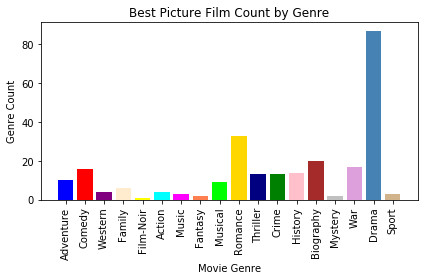

In [17]:
#creating a list of colors so we can run our first bar graph with different colors for each genre

colors = ['blue', 'red','purple','blanchedalmond','yellow','aqua','magenta','coral','lime','gold','navy','green','pink','brown',\
         'silver','plum','steelblue','tan', 'maroon', 'slategray','lemonchiffon','orange']

#plotting the bar graph of the different film genres and their count

plt.bar(genre_list_award, genre_counts_award, color = colors)

#setting the tick locations and tick values...along with the labels and title

tick_locations = [value for value in genre_list_award]
plt.xticks(tick_locations, rotation = 'vertical')
plt.xlabel('Movie Genre')
plt.ylabel('Genre Count')
plt.title('Best Picture Film Count by Genre')
plt.tight_layout()

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/Best_Picture_Genre.png")

plt.show()

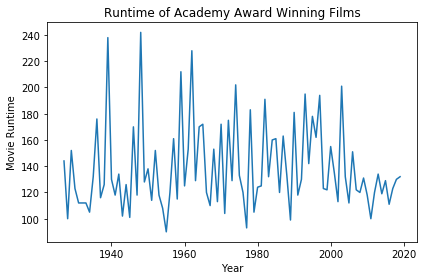

In [18]:
#plotting a line graph based on the year of best picture films by their runtime

plt.plot(award_df['Year'], award_df['Minutes'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Academy Award Winning Films')
plt.tight_layout()

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

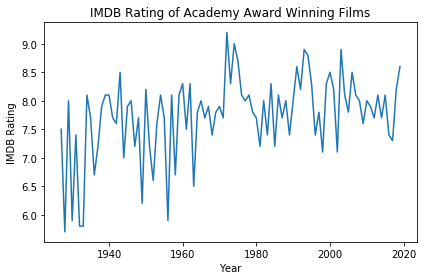

In [19]:
#plotting a line graph based on the year of best picture films and their IMDB Rating

plt.plot(award_df['Year'], award_df['IMDB Rating'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating of Academy Award Winning Films')
plt.tight_layout()

plt.show

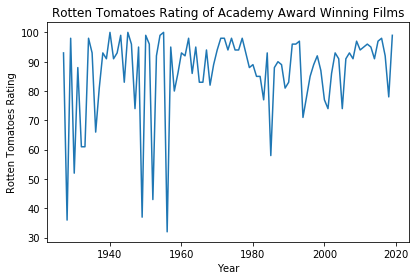

In [20]:
#plotting a line graph based on the year of best picture films and their Rotten Tomatoes Rating

plt.plot(award_df['Year'], award_df['Rotten Tomatoes Rating'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Rating of Academy Award Winning Films')
plt.tight_layout()

plt.show()

In [21]:
#marker between award data and top grossing data

print('\U0001F92E')

🤮


In [22]:
#splitting up the genre of each top grossing film into separate columns

grossing_df[['Genre 1', 'Genre 2', 'Genre 3', 'Genre 4', 'Genre 5', 'Genre 6', 'Genre 7']] = grossing_df['Movie Genre'].str.split(",",expand = True)

In [23]:
#splitting up the genre of each top grossing film into separate columns

grossing_df['Genre 1'] = grossing_df['Genre 1'].str.strip()
grossing_df['Genre 2'] = grossing_df['Genre 2'].str.strip()
grossing_df['Genre 3'] = grossing_df['Genre 3'].str.strip()
grossing_df['Genre 4'] = grossing_df['Genre 4'].str.strip()
grossing_df['Genre 5'] = grossing_df['Genre 5'].str.strip()

In [24]:
#taking the runtime of each film and splitting the actual minutes from the word "min"

grossing_df[['Minutes', 'Minutes 2']] = grossing_df['Runtime'].str.split(" ",expand = True)

In [25]:
#replacing the incorrect formats of the Rotten Tomatoes Ratings with the correct formats

grossing_df = grossing_df.replace(to_replace = ["95/100"], value = "95%")
grossing_df = grossing_df.replace(to_replace = ["59/100"], value = "59%")

In [26]:
#replacing the "%" from the Rotten Tomatoes Ratings with a ".0" and changing the type to "float"

grossing_df['Rotten Tomatoes Rating'] = grossing_df['Rotten Tomatoes Rating'].str.replace(r'%', r'.0').astype('float')

In [27]:
#changing the minutes column (runtime) from a string to a float

grossing_df['Minutes'] = grossing_df['Minutes'].astype('float')

In [28]:
#replacing the "/10" from the IMDB Ratings with nothing and changing the type to "float"

grossing_df['IMDB Rating'] = grossing_df['IMDB Rating'].str.replace(r'/10', r'').astype('float')

In [29]:
#running through the entire top grossing data frame and replacing any values of "none" with a blank value

grossing_df = grossing_df.replace(to_replace = [None], value = "")

In [30]:
#creating a list from all of the unique values in all 7 of the genre columns from the top grossing data

genre_list_grossing = list(set(list(np.unique(grossing_df[['Genre 1','Genre 2','Genre 3', 'Genre 4','Genre 5']].values))[1:]))

In [31]:
#checking to make sure the top grossing list was stored correctly and that it looks accurate

genre_list_grossing

['Family',
 'Horror',
 'Short',
 'Documentary',
 'Romance',
 'Crime',
 'History',
 'Comedy',
 'Music',
 'Action',
 'Adventure',
 'News',
 'Western',
 'Musical',
 'Thriller',
 'War',
 'Sci-Fi',
 'Fantasy',
 'Mystery',
 'Biography',
 'Drama',
 'Animation']

In [32]:
#create a blank list to store the count of each genre from our genre list

genre_counts_grossing = []

#create a for loop to count how many times each genre shows up in one of the 7 genre columns

for genre in genre_list_grossing:
    
    genre_count_grossing = ((grossing_df['Genre 1'] == genre) | (grossing_df['Genre 2'] == genre) | (grossing_df['Genre 3'] == genre) | (grossing_df['Genre 4'] == genre) | (grossing_df['Genre 5'] == genre)).sum()
    
    genre_counts_grossing.append(genre_count_grossing)

In [33]:
#checking to make sure that our top grossing genre counts were stored correctly and that they look accurate

genre_counts_grossing

[22, 3, 3, 3, 20, 5, 7, 13, 2, 30, 50, 1, 3, 8, 13, 3, 21, 25, 4, 4, 42, 12]

In [34]:
#creating a data frame with genre and genre count from the above lists for the top grossing films

genre_grossing_df = pd.DataFrame({
    'Genre': genre_list_grossing,
    'Count': genre_counts_grossing    
})

#sorting our new data frame by count

genre_grossing_df.sort_values(by=['Count'], ascending = False)

,Genre,Count
10,Adventure,50
20,Drama,42
9,Action,30
17,Fantasy,25
0,Family,22
16,Sci-Fi,21
4,Romance,20
14,Thriller,13
7,Comedy,13
21,Animation,12


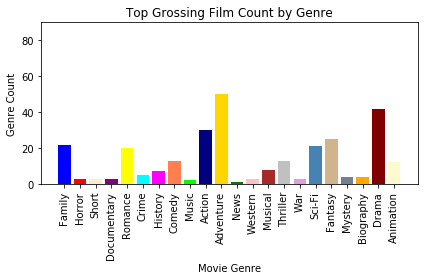

In [51]:
#creating a list of colors so we can run our first bar graph with different colors for each genre

colors = ['blue', 'red', 'blanchedalmond','purple','yellow','aqua','magenta','coral','lime','navy','gold','green','pink','brown',\
         'silver','plum','steelblue','tan', 'slategray','orange', 'maroon','lemonchiffon']

#plotting the bar graph of the different film genres and their count

plt.bar(genre_list_grossing, genre_counts_grossing, color=colors)

#setting the tick locations and tick values...along with the labels and title

tick_locations = [value for value in genre_list_grossing]
plt.xticks(tick_locations, rotation = 'vertical')
plt.xlabel('Movie Genre')
plt.ylabel('Genre Count')
plt.title('Top Grossing Film Count by Genre')
plt.ylim((0,90))
plt.tight_layout()

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/Top_Grossing_Genre.png")

plt.show()

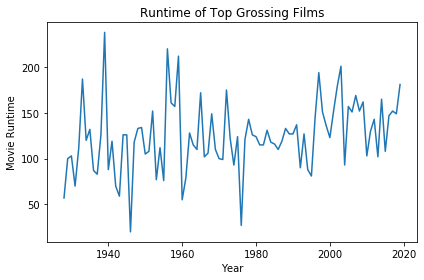

In [52]:
#plotting a line graph based on the year of each top grossing film by their runtime

plt.plot(grossing_df['Year'], grossing_df['Minutes'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Top Grossing Films')
plt.tight_layout()

plt.show()

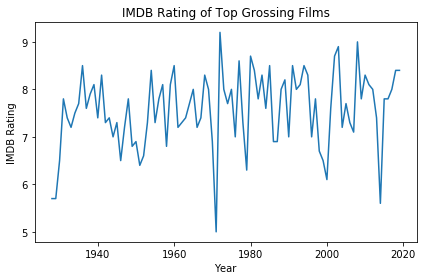

In [37]:
#plotting a line graph based on the year of each top grossing film and their IMDB Rating

plt.plot(grossing_df['Year'], grossing_df['IMDB Rating'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating of Top Grossing Films')
plt.tight_layout()

plt.show()

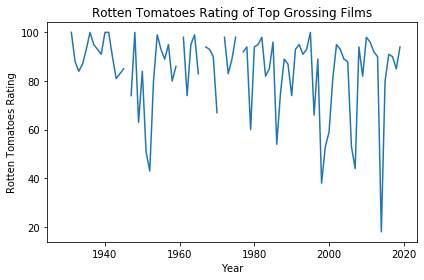

In [38]:
#plotting a line graph based on the year of each top grossing film and their Rotten Tomatoes Rating

plt.plot(grossing_df['Year'], grossing_df['Rotten Tomatoes Rating'])

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Rating of Top Grossing Films')
plt.tight_layout()

plt.show()

In [39]:
#marker - everything below this point is for running visualizations to support our data

print('\U0001F92F')

🤯


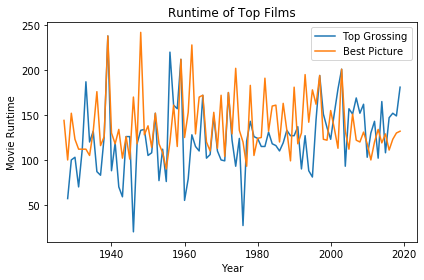

In [40]:
#plotting a line graph that compares the runtime of top grossing films vs. best picture films back to 1927

plt.plot(grossing_df['Year'], grossing_df['Minutes'], label = 'Top Grossing')

plt.plot(award_df['Year'], award_df['Minutes'],label = 'Best Picture')

#plotting labels and title

plt.xlabel('Year')
plt.ylabel('Movie Runtime')
plt.title('Runtime of Top Films')
plt.legend(loc = 'best')
plt.tight_layout()

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/Runtime_Comparison.png")

plt.show()

In [41]:
#running a simple summary statistics table on our top grossing films data

grossing_df[['Minutes']].describe()

,Minutes
count,92.000000
mean,124.423913
std,38.620507
min,20.000000
25%,102.750000
50%,123.500000
75%,149.000000
max,238.000000


In [42]:
#running a simple summary statistics table on our award winning films data

award_df[['Minutes']].describe()

,Minutes
count,93.000000
mean,138.440860
std,32.671109
min,90.000000
25%,118.000000
50%,129.000000
75%,155.000000
max,242.000000


In [43]:
#finding out the total number of hours of all of the top grossing films combined

grossing_df['Minutes'].sum()/60

190.78333333333333

In [44]:
#finding out the total number of hours of all of the best picture films combined

award_df['Minutes'].sum()/60

214.58333333333334

In [45]:
#creating a data frame that we can use to run our visualizations more easily

award_score_df = pd.DataFrame ({
    
    'Year': award_df['Year'],
    'Best Picture IMDB': award_df['IMDB Rating'], 
    'Best Picture Rotten Tomatoes Rating': award_df['Rotten Tomatoes Rating'],
    'Top Grossing IMDB': grossing_df['IMDB Rating'], 
    'Top Grossing Rotten Tomatoes Rating': grossing_df['Rotten Tomatoes Rating']
})

In [46]:
#replacing any NaN values with a 0 so it doesn't affect our visualizations

award_score_df = award_score_df.replace(np.nan, 0)

#checking to make sure the data frame is clean

award_score_df.head()

,Year,Best Picture IMDB,Best Picture Rotten Tomatoes Rating,Top Grossing IMDB,Top Grossing Rotten Tomatoes Rating
0,1927,7.5,93.0,0.0,0.0
1,1928,5.7,36.0,5.7,0.0
2,1929,8.0,98.0,5.7,36.0
3,1930,5.9,52.0,6.5,0.0
4,1931,7.4,88.0,7.8,100.0


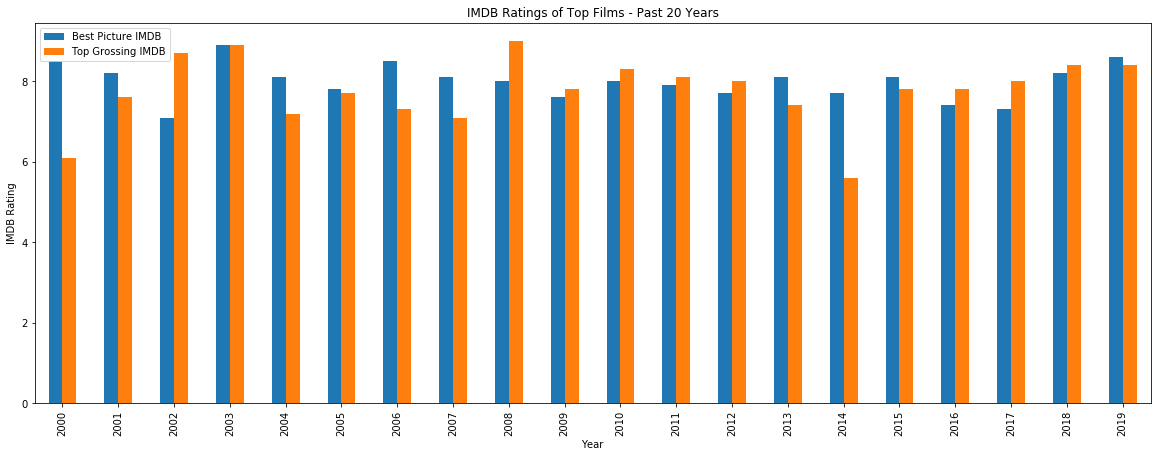

In [47]:
#plotting a bar graph that compares the last 20 years of IMDB ratings for best picture films vs. top grossing films

award_score_df[award_score_df['Year']>1999].plot('Year',['Best Picture IMDB', 'Top Grossing IMDB'], kind = 'bar',figsize = (20,7))

#plotting labels and title

plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings of Top Films - Past 20 Years')

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/IMDB_Rating_20.png")
plt.show()

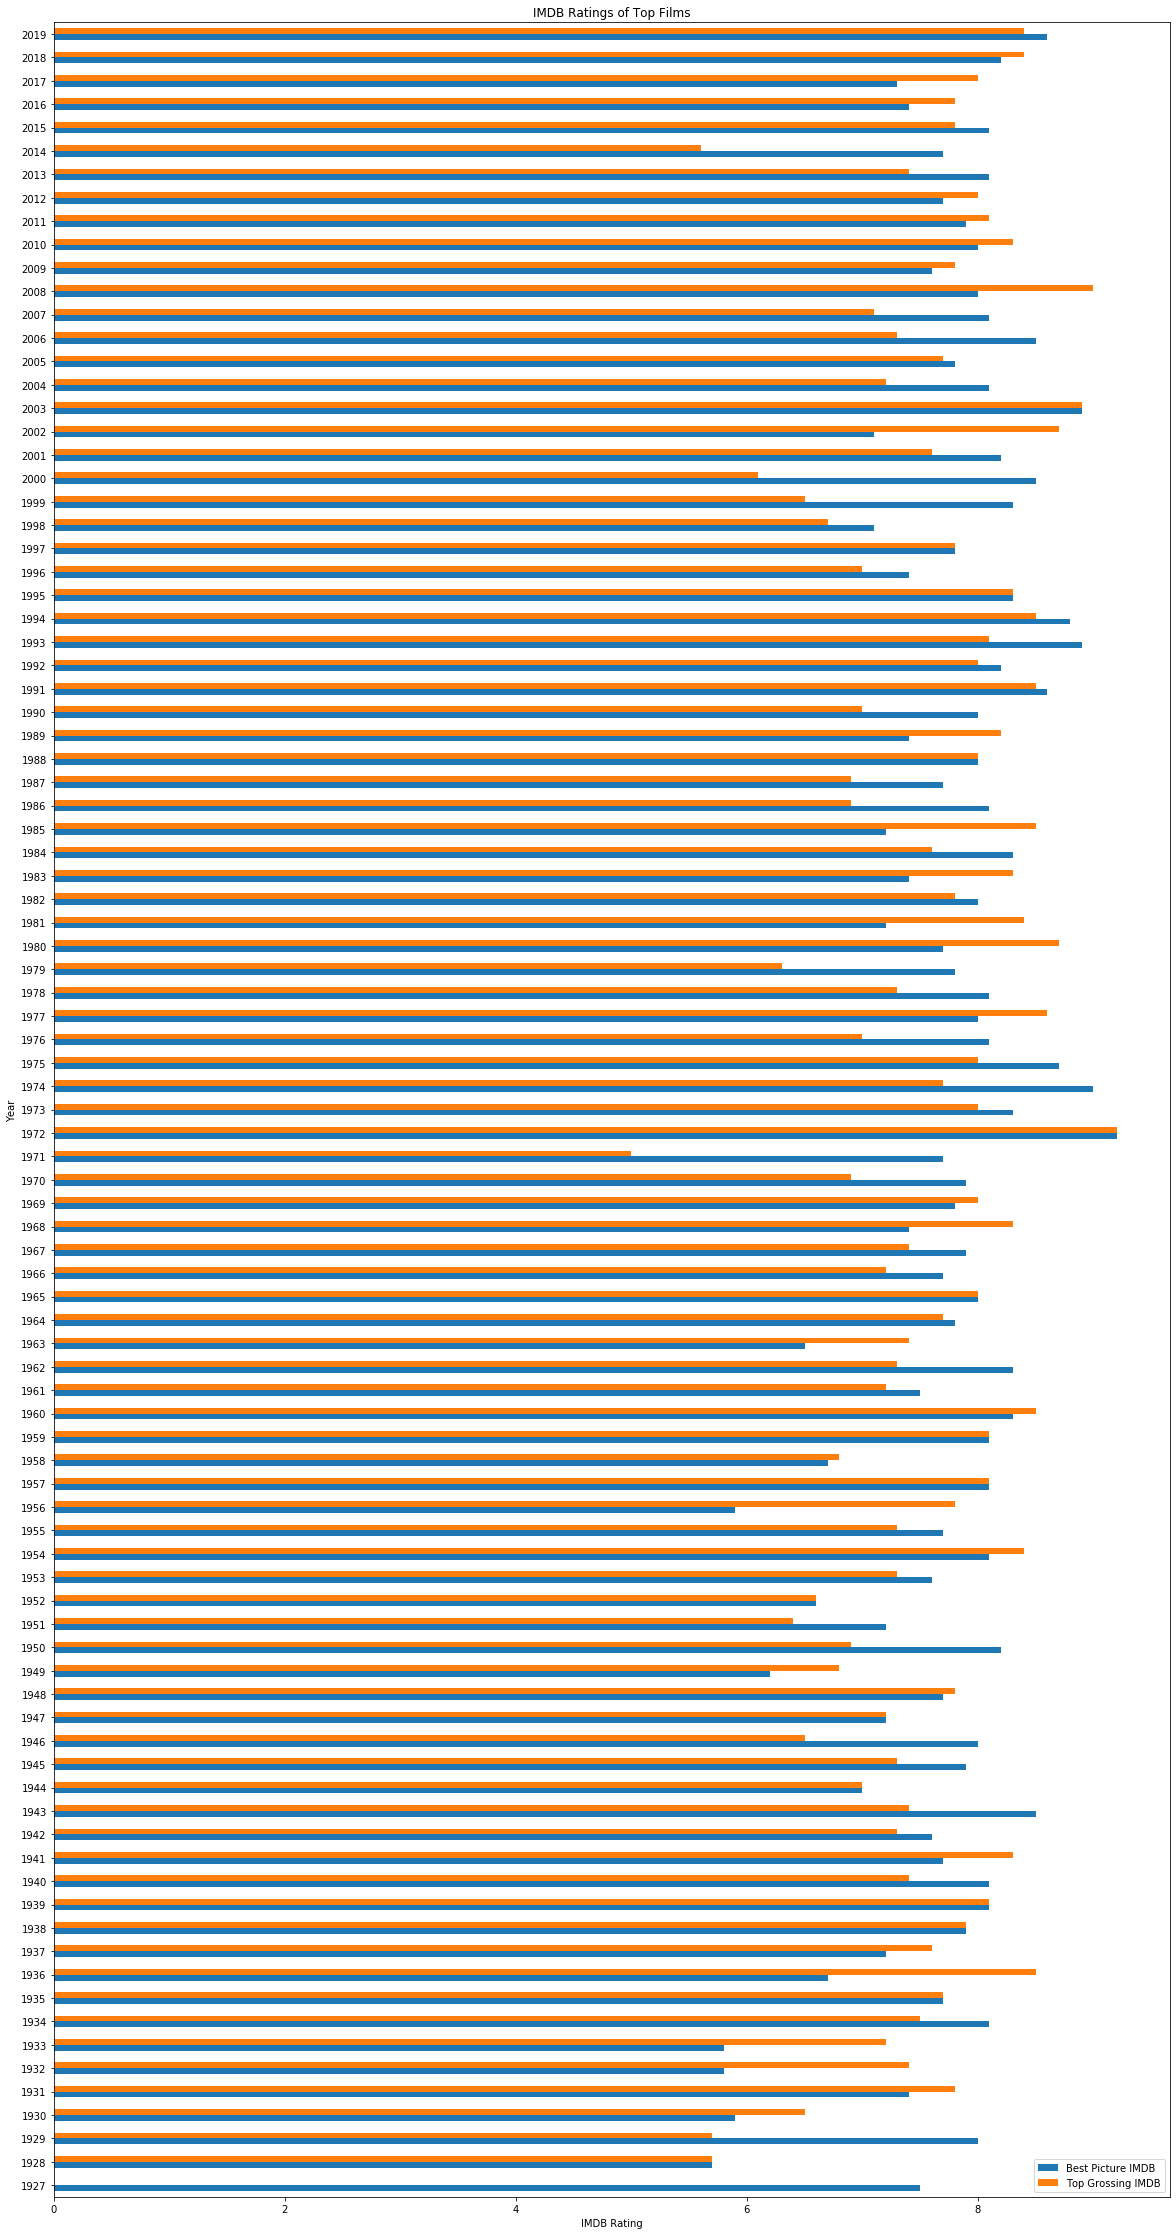

In [48]:
#plotting a horizontal bar graph that compares the IMDB Ratings of best picture films vs. top grossing films back to 1927

award_score_df.plot('Year',['Best Picture IMDB', 'Top Grossing IMDB'],kind = 'barh',figsize = (20,40))

#plotting labels and title

plt.ylabel('Year')
plt.xlabel('IMDB Rating')
plt.title('IMDB Ratings of Top Films')

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/IMDB_Rating_All.png")
plt.show()

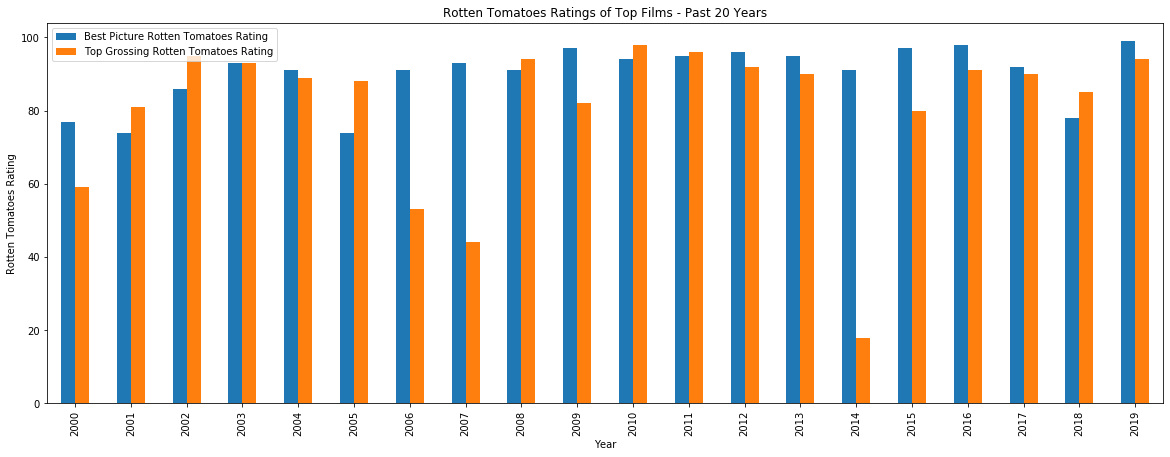

In [49]:
#plotting a bar graph that compares the last 20 years of Rotten Tomatoes Ratings for best picture films vs. top grossing films

award_score_df[award_score_df['Year']>1999].plot('Year',['Best Picture Rotten Tomatoes Rating', 'Top Grossing Rotten Tomatoes Rating'], kind = 'bar',figsize = (20,7))

#plotting labels and title

plt.ylabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Ratings of Top Films - Past 20 Years')

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/Rotten_Tomatoes_Rating_20.png")

plt.show()

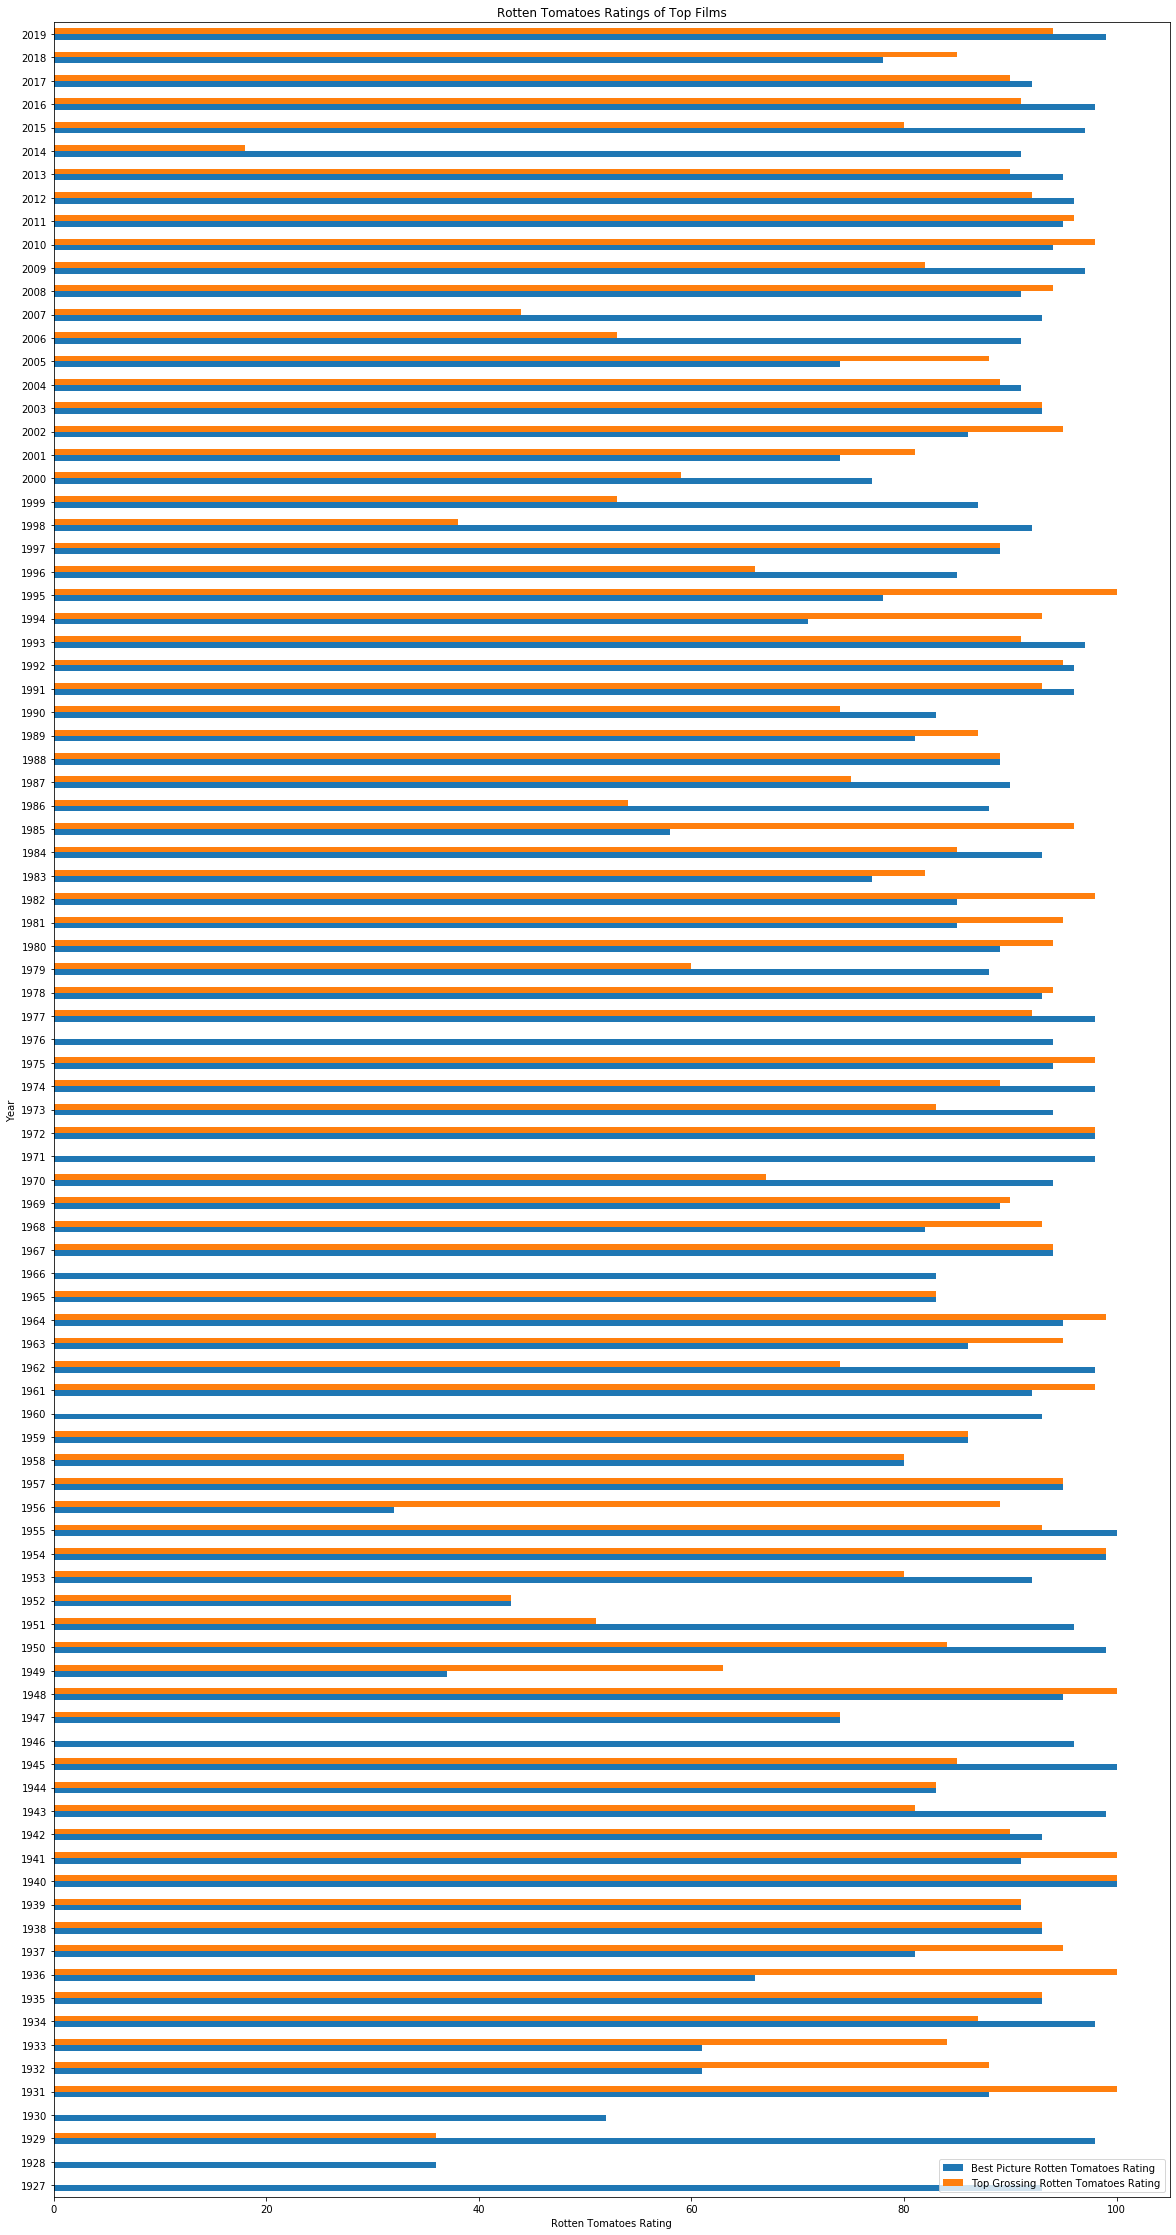

In [50]:
#plotting a horizontal bar graph that compares the Rotten Tomatoes Ratings of best picture films vs. top grossing films back to 1927

award_score_df.plot('Year',['Best Picture Rotten Tomatoes Rating','Top Grossing Rotten Tomatoes Rating'],kind = 'barh',figsize = (20,40))

#plotting labels and title

plt.ylabel('Year')
plt.xlabel('Rotten Tomatoes Rating')
plt.title('Rotten Tomatoes Ratings of Top Films')

#saving the figure to a png file and showing it in our notebook

plt.savefig("Images/Rotten_Tomatoes_Rating_All.png")

plt.show()